<a href="https://colab.research.google.com/github/tesnim-ker/ReceiptsDetection/blob/main/Receipts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (12.5 MB/s)
debconf: unable to initialize frontend

In [ ]:
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
import os
import re
import cv2
import shutil
import random
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as image
import pandas as pd
from tqdm import tqdm
import numpy as np
from PIL import Image
import pytesseract
import numpy as np
from keras.models import Model
from PIL import Image, ImageDraw
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

# **Loading Data**

In [ ]:
img_path= "drive/My Drive/receiptdataset"

def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, 'images', file)
                          for file in os.listdir(path )
                          if file.endswith('.jpg')])
    return image_files
loadImages(img_path)

['drive/My Drive/receiptdataset/images/1000-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1002-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1003-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1004-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1005-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1006-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1007-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1008-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1009-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1010-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1011-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1012-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1013-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1014-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1015-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1016-receipt.jpg',
 'drive/My Drive/receiptdataset/images/1017-receipt.jpg',
 'drive/My Dri

# Transforming the image dataset into CSV file 

In [ ]:
path = 'drive/My Drive/receiptdataset/'
filename = 'data.csv'
files = os.listdir(path)
dim = (100, 100)
cls = 1
df = pd.DataFrame(columns = [f'pix-{i}' for i in range(1, 1+(dim[0]*dim[1]))]+['class'])
for i in tqdm(range(1, 1+len(files))):
    # img =Image.open(path+files[i]
    df.loc[i] = files[i-1] 

df.to_csv(filename,index = False)
print('Task Completed')

100%|██████████| 161/161 [02:38<00:00,  1.02it/s]


Task Completed


In [ ]:
data= pd.read_csv('data.csv', header=0)
display(data['class'])

0      1142-receipt.jpg
1      1183-receipt.jpg
2      1145-receipt.jpg
3      1167-receipt.jpg
4      1197-receipt.jpg
             ...       
156    1063-receipt.jpg
157    1039-receipt.jpg
158    1093-receipt.jpg
159    1095-receipt.jpg
160    1181-receipt.jpg
Name: class, Length: 161, dtype: object

# **Dividing the dataset into Train set, Dev set and Test set**

In [ ]:
train1, test = train_test_split(data, test_size=0.15 , random_state=42)
train, validation = train_test_split(train1, test_size=0.15 , random_state=42)

In [ ]:
len(train1),len(test),len(validation)

(136, 25, 21)

# **Image pre-processing**

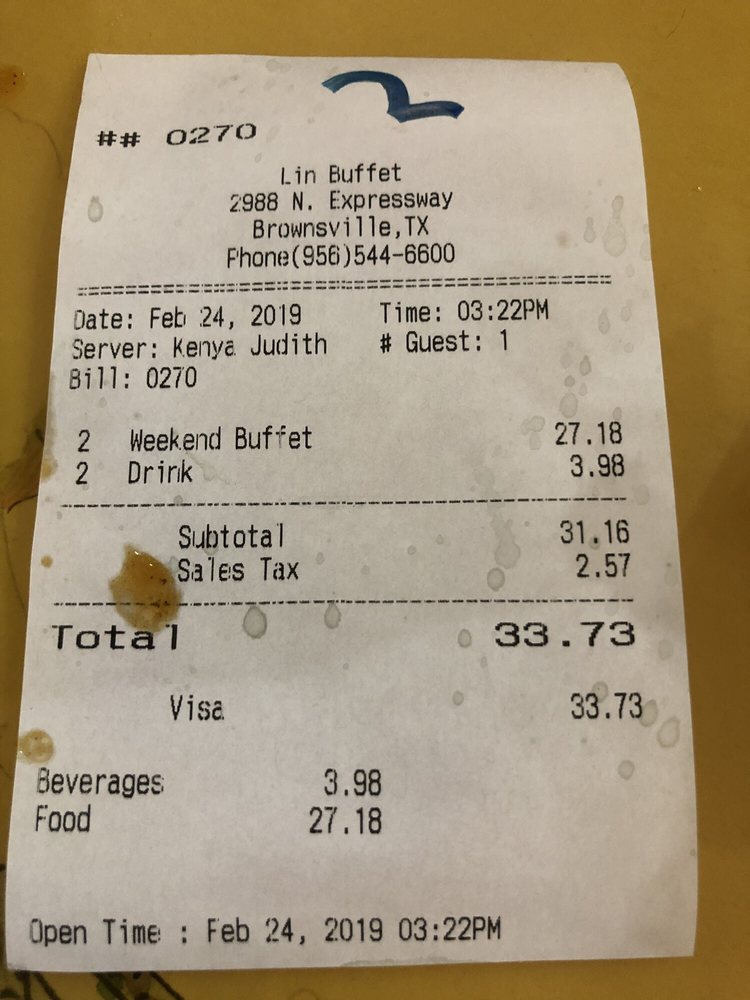

In [ ]:
from google.colab.patches import cv2_imshow
dir='drive/My Drive/receiptdataset/1074-receipt.jpg'
image = cv2.imread(dir)
cv2_imshow(image)

Transforming image into grey scale.

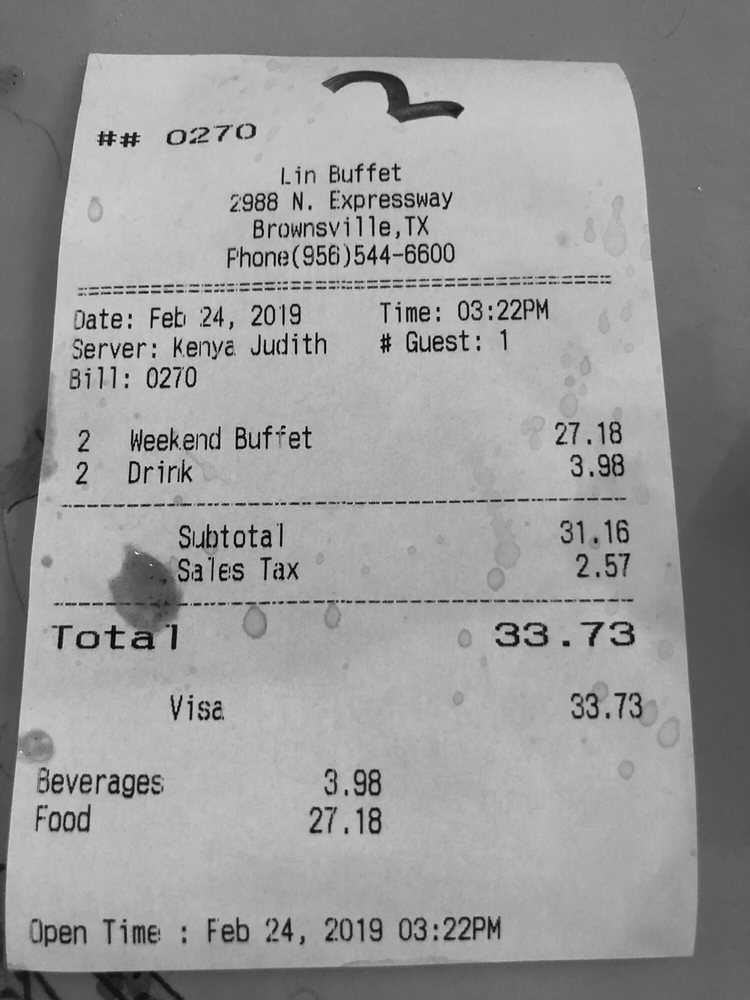

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

Blurring the image

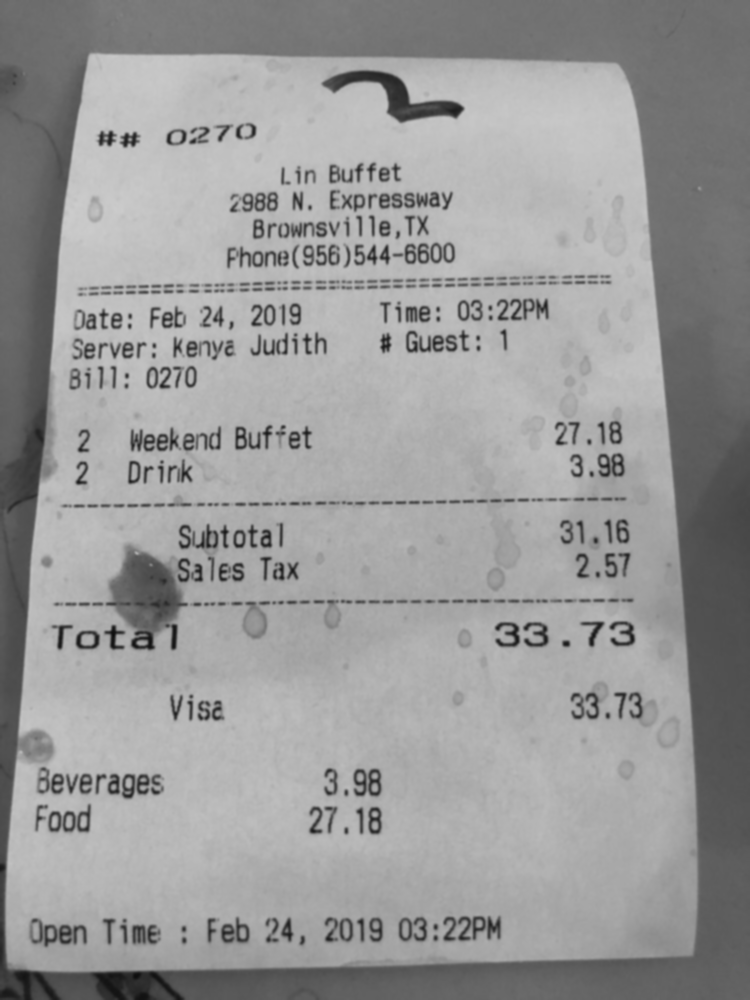

In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(blurred)

In [ ]:
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)


In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

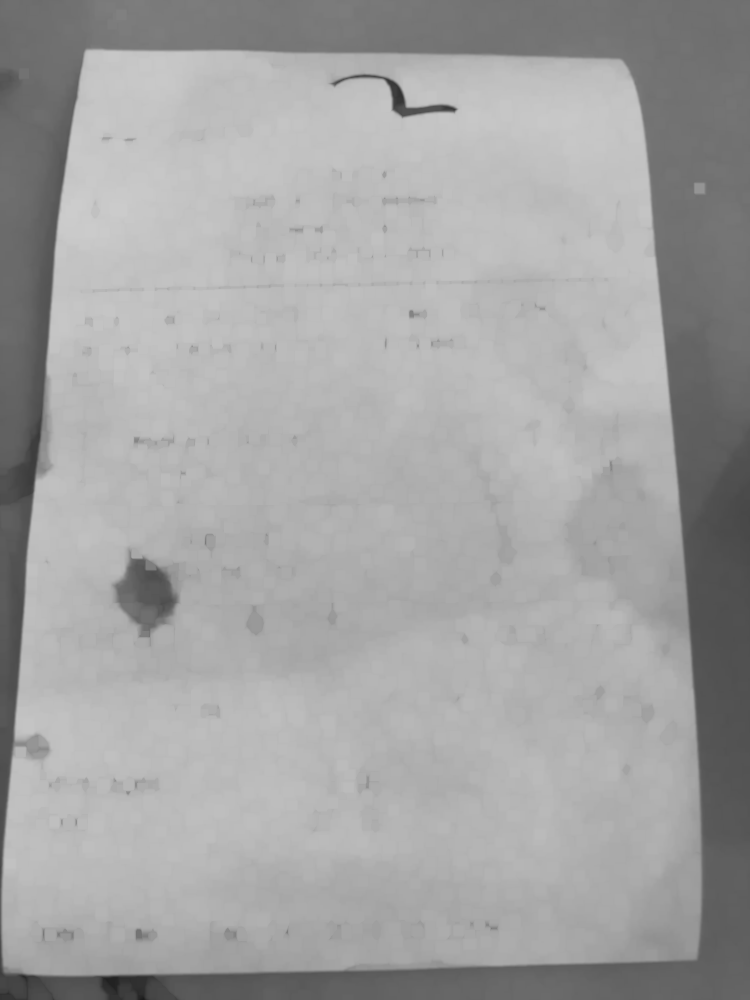

In [ ]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
dilated = cv2.dilate(blurred, rectKernel)
cv2_imshow(dilated)

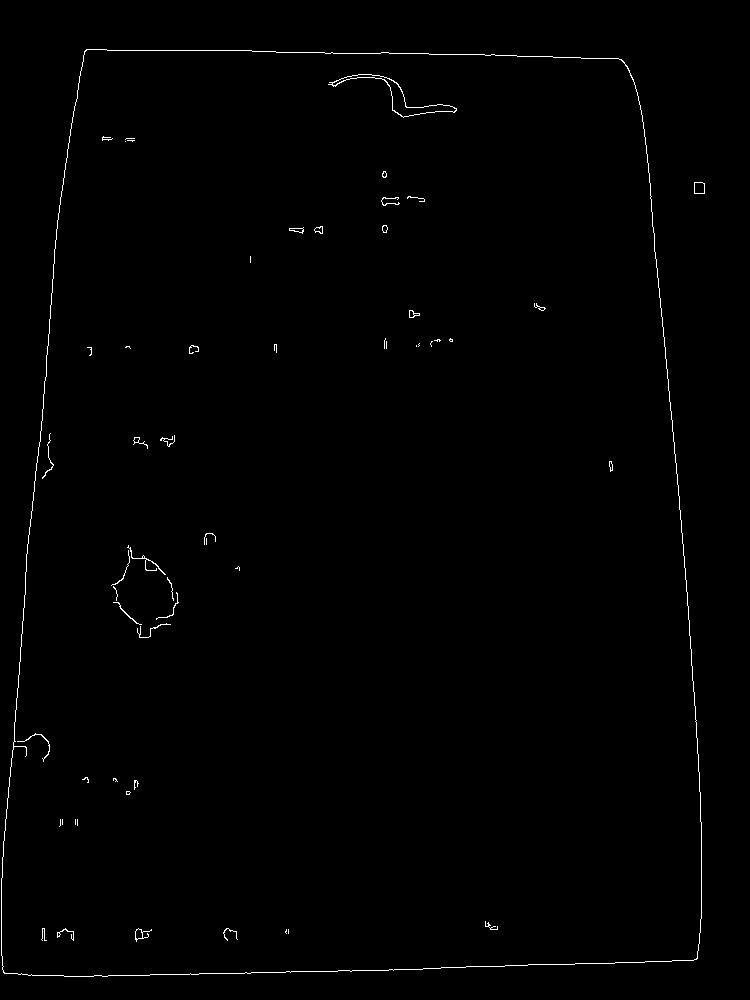

In [ ]:
edged = cv2.Canny(dilated, 50, 125, apertureSize=3)
cv2_imshow(edged)

# **Finding text countours**

In [ ]:
def find_cont(img_in, debug = False, draw = False):
    bbox_list = []
    backtorgb = None
    
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0,255,0), 3)
    
    if debug:
        print(f'Found {len(contours)} contours / numbers')
        backtorgb = cv2.cvtColor(img_in.astype('float32'), cv2.COLOR_GRAY2RGB)

    for (i, c) in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(c)
        bbox_list.append([x, y, w, h])
        if draw:
            cv2.rectangle(backtorgb, (x,y), (x+w, y+h), (255,0,0), 5)

    if debug:
        print(f'BBoxes coordinates: {bbox_list}')
    return bbox_list, backtorgb

In [ ]:
bbox_list, backtorgb = find_cont(image, debug = True, draw = True)

Found 74 contours / numbers


error: ignored

# **VGG16 Model**

VGG-16 is a **convolutional neural network** that is 16 layers deep. The network has an image input size of 224-by-224.
Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2.

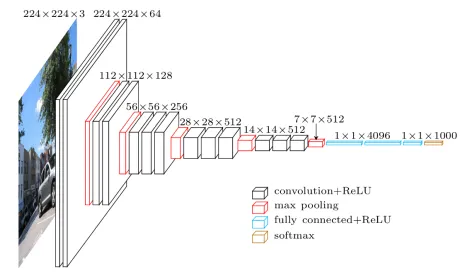





In [ ]:
input_tensor = Input(shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=x)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Resizing the image

In [ ]:
img = cv2.resize(image, (224, 224))
img = np.expand_dims(img, axis=0)
img = img / 255.0

predicting if the image contains text sections then extracting text regions.

In [ ]:
predictions = model.predict(img)
predictions = np.argmax(predictions, axis=1)


1/1 [==============================] - 2s 2s/step


In [ ]:
text_regions = []
for i in range(len(predictions)):
    if predictions[i] == 1:
        (x, y, w, h) = (i * 32, 0, 32, 32)
        text_regions.append((x, y, w, h))


Specifying the total amount in the regular expression to extract the total amount text from other text regions.

In [ ]:
regex = r'(\d+\.\d{2})\s*TTC'
total_amount = None
for region in text_regions:
    (x, y, w, h) = region
    text_region = img[y:y+h, x:x+w]
    text = pytesseract.image_to_string(Image.fromarray(text_region), lang='eng', config='--psm 6')
    matches = re.findall(regex, text)
    if len(matches) > 0:
        total_amount = matches[0]
        break


Drawing bouding boxes around the detected text


In [ ]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
draw = ImageDraw.Draw(pil_img)
for region in text_regions:
    (x, y, w, h) = region
    draw.rectangle((x, y, x+w, y+h), outline='red', width=2)
img = np.array(pil_img)


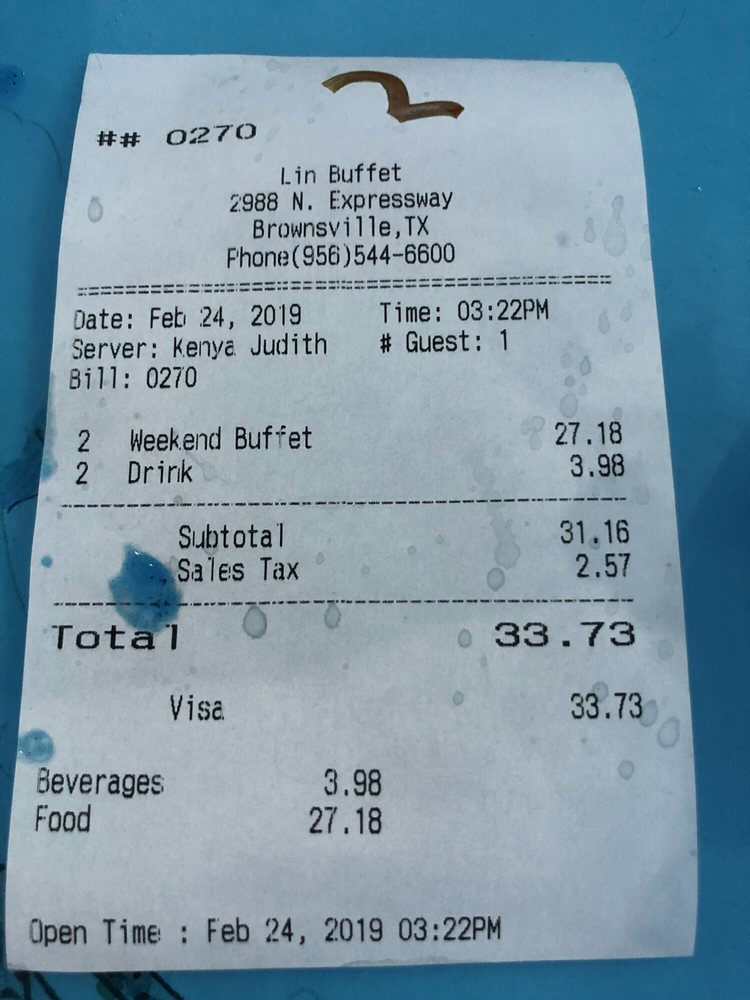

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
